# 유방암 환자 데이터셋을 활용한 지도학습 학습모델 평가 

In [1]:
# 불필요한 경고 출력을 방지
import warnings
warnings.filterwarnings('ignore')

## 학습모델 평가 방법(Evaluation)
- 오차 (Error) 이해
- Accuracy(정확도)
- Confusion Matrix(오차행렬)
- Precision(정밀도)
- Recall(재현율)
- F1 score
- ROC/AUC


In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

유방암 환자 데이터셋 로드  
sklearn의 내장 dataset 활용 : load_breast_cancer  
target :
- 1 양성종양 : 착한 종양(Positive)
- 0 악성종양 : 나쁜 종양(Negative)

In [7]:
cancer = load_breast_cancer()

In [8]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [9]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [27]:
# feature(X), target(y), feature_names 분리
data = cancer['data']
target = cancer['target']
feature_names=cancer['feature_names']

데이터 프레임으로 생성

In [29]:
df = pd.DataFrame(data=data, columns=feature_names)
df['target'] = cancer['target']

In [30]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [31]:
df_pos = df.loc[df['target']==1] # 양성종양-착한종양
df_neg = df.loc[df['target']==0] # 악성종양-나쁜종양

In [36]:
df_pos

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1


In [37]:
df_pos.shape

(357, 31)

In [38]:
df_neg.shape

(212, 31)

극단적으로 데이터 표현, 다음과 같이 data 생성  
양성 환자 **357개** + 악성 환자 **5개**

In [68]:
df_pos.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1


In [69]:
df_neg[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [70]:
df_sample = pd.concat([df_pos, df_neg[:5]], sort=True)

In [71]:
X = df_sample.drop('target', axis=1)
y = df_sample['target']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=20, shuffle=True)

## 모델 정의 및 모델 학습

In [74]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier(max_depth=5)
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [65]:
pred_y = model_dtc.predict(X_test)
pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [75]:
(pred_y == y_test).mean()

0.989010989010989

의사가 모든 암환자 진단을 양성으로 판단한다고 가정하면,  

In [76]:
# 모두 양성종양으로 진단하는 데이터 구성
pred_temp = np.ones(shape=y_test.shape)
pred_temp

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [77]:
pred_temp == y_test

55      True
61      True
464     True
3      False
268     True
       ...  
175     True
179     True
304     True
405     True
485     True
Name: target, Length: 91, dtype: bool

In [80]:
(pred_temp == y_test).mean()

0.989010989010989

의사가 모두 양성종양으로 진단한것과 ML 예측을 비교했을 때,  
예측률은 높으나 유능한 의사라 보기 어려움

### 정확도의 모순
- 정확도(Accuracy) : 실제 데이터에서 예측 데이터가 얼마나 같은지 판단하는 자료 
- Accuracy = (예측 결과와 실제 데이터가 동일한 건수) / (전체 예측 데이터 건수)

정확도(accuracy)만 보고 분류기의 성능을 판별하는 것은 **위와 같은 오류**에 빠질 수 있음.

이를 보완하기 위해 나온 지표들을 살펴보자.

### confusion maxtix(오차 행렬, 혼동 행렬) 
이진 분류의 **예측 오류가 얼마인지와 어떠한 유형의 예측 오류**가 발생하고 있는지를 함께 나타내는 자료

<img src='http://www.info.univ-angers.fr/~gh/Predipath/confusion.png' width="500px">

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FPPAoe%2FbtrewxCS6Jn%2FHNzbSntqGyhIcPvv1eNWX1%2Fimg.png' width="500px">


<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbKYE4M%2FbtrewgA9ioX%2F7geXmrx7gC8mAQKEFyQcgK%2Fimg.png' width="500px">

정확도(Accuracy) : 실제 데이터에서 예측 데이터가 얼마나 같은지 판단하는 자료 
#### 정확도(Accuracy) = (TN+TP) / (TN+FP+FN+TP)

In [95]:
# confusion_matrix 결과 확인
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_dtc) # (target값, 예측결과값)

array([[ 0,  1],
       [ 0, 90]], dtype=int64)

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

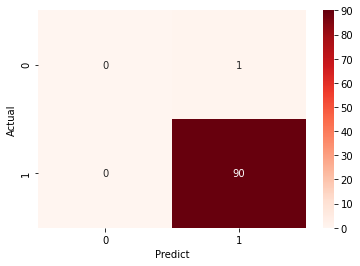

In [104]:
sns.heatmap(confusion_matrix(y_test, pred_dtc), annot=True, cmap='Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')

plt.show()

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbKYE4M%2FbtrewgA9ioX%2F7geXmrx7gC8mAQKEFyQcgK%2Fimg.png' width='500px' align='left'>

## 정밀도(precision), 재현율(recall), f1-score

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbcl2mQ%2FbtretcGttea%2FMdaetVdrYnb2OZTEI3v8P1%2Fimg.jpg' align='left'>

In [106]:
from sklearn.metrics import precision_score, recall_score

## 정밀도, 재현율, f1-score

### 정밀도 (precision)
예측을 Positive로 한 대상 중에 예측과 실제 값치 Positive로 일치한 데이터의 비율.  
Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 **양성 예측 정확도** 라고 함.  
정밀도  = TP / (TP + FP)

In [108]:
# 정밀도 구하기
precision_score(y_test, pred_dtc)

0.989010989010989

In [109]:
90/91

0.989010989010989

무조건 **양성**으로 판단하면 좋은 정밀도를 얻기 때문에 유용하지 않음.

### 재현율 (recall)
실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율   
정확하게 감지한 **양성 샘플의 비율**

민감도 (sensitivity) 혹은 TRP(True Positive Rate) 이라고도 함.  
재현율 = TP / (TP + FN)

In [112]:
# 재현율 구하기
recall_score(y_test, pred_dtc)

1.0

In [113]:
90/90 #TP/(TP+FN)

1.0

정밀도와 재현율의 trade off 관계

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcsCuPC%2FbtreoU1fkNK%2FFQjniKMtev65WSfiJxptx0%2Fimg.png' width='400px' align='center'>

[참고] 정밀도와 재현율   
https://velog.io/@sset2323/03-03.-%EC%A0%95%EB%B0%80%EB%8F%84%EC%99%80-%EC%9E%AC%ED%98%84%EC%9C%A8

정밀도와 재현율의 수치가 적절하게 조합되어 분류의 종합적인 성능 평가에 사용될 수 있는 평가 지표가 필요함.

### f1 score
정밀도와 재현율의 **조화 평균**을 나타내는 지표  
조화평균 참고 : https://www.youtube.com/watch?v=pwJ-SDyZ_3A  
조화평균 : 평균적인 변화율 계산, 공식(2ab/a+b)

$$2*\frac{정밀도 * 재현율}{정밀도 + 재현율}=\frac{TP}{TP+\frac{FN+FP}{2}}$$



In [116]:
from sklearn.metrics import f1_score

In [117]:
f1 = f1_score(y_test, pred_dtc)

In [118]:
print('f1 스코어: {0:.4f}'.format(f1))

f1 스코어: 0.9945


###분류 평가 종합 report(precision, recall, f1-score 한꺼번에)

In [122]:
from sklearn.metrics import classification_report
# Predict를 수행하고 classification_report() 결과 출력
pred_y = model_dtc.predict(X_test)
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      0.99      0.99        90

    accuracy                           0.98        91
   macro avg       0.49      0.49      0.49        91
weighted avg       0.98      0.98      0.98        91



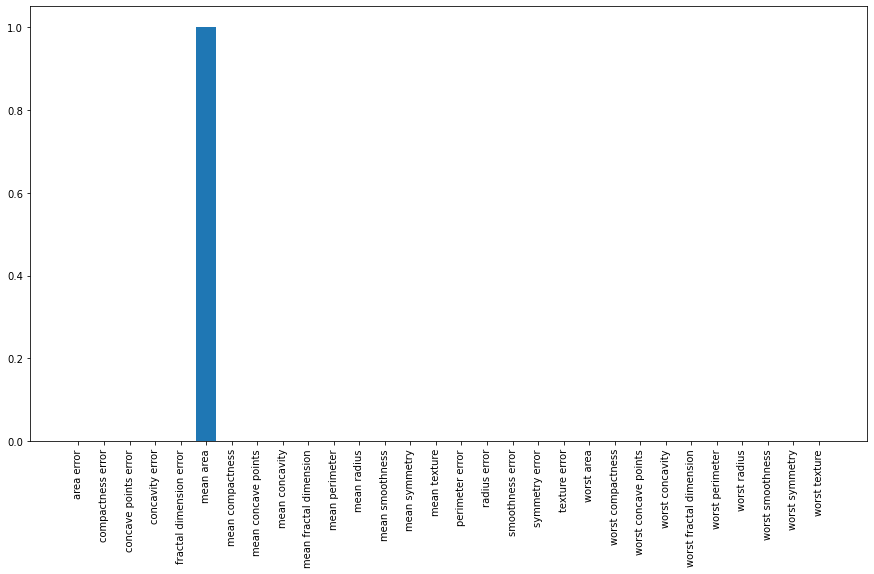

In [124]:
# 모델 학습 성능에 영향을 준 feature 확인하기
fig = plt.figure(figsize=(15,8))
plt.bar(X.columns, model_dtc.feature_importances_)
plt.xticks(rotation=90)
plt.show()